In [1]:
pwd

'/home/wsuser/work'

**IMPORT THE LIBRARIES**

In [9]:
import keras
import tensorflow as tf
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical

**LOAD THE DATA** 

In [10]:
# the data, split between train and test sets
(x_train,y_train),(x_test,y_test)=mnist.load_data()


**ANALYZE THE DATA**

In [12]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)
x_train[0]

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

**PREPROCESS THE DATA AND RESHAPING**

In [13]:
#Preprocess the data
num_classes=10
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)
input_shape = (28,28,1)

**APPLY ONE-HOT ENCODING**

In [14]:
#Convert class vectors to binary class matrices
y_train=keras.utils.np_utils.to_categorical(y_train,num_classes)
y_test=keras.utils.np_utils.to_categorical(y_test,num_classes)
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train=x_train/255
x_test=x_test/255
print('x_train shape:',x_train.shape)
print(x_train.shape[0],'train samples')


x_train shape: (60000, 28, 28, 1)
60000 train samples


**ADDING LAYERS**

In [15]:
#Create the Model
batch_size=128
num_classes=10
epochs=20
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax'))

**COMPILING THE MODEL**

In [16]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=tf.keras.optimizers.Adadelta(),metrics=['accuracy'])

**TRAIN THE MODEL**

In [17]:
hist = model.fit(x_train, y_train,batch_size=20,epochs=5,verbose=1,validation_data=(x_test, y_test))

Epoch 1/5
3000/3000 [==============================] - 119s 40ms/step - loss: 2.1598 - accuracy: 0.3251 - val_loss: 1.9373 - val_accuracy: 0.6680
Epoch 2/5
3000/3000 [==============================] - 119s 40ms/step - loss: 1.6988 - accuracy: 0.5996 - val_loss: 1.2934 - val_accuracy: 0.7955
Epoch 3/5
3000/3000 [==============================] - 120s 40ms/step - loss: 1.1597 - accuracy: 0.7036 - val_loss: 0.8035 - val_accuracy: 0.8354
Epoch 4/5
3000/3000 [==============================] - 118s 39ms/step - loss: 0.8560 - accuracy: 0.7577 - val_loss: 0.5910 - val_accuracy: 0.8571
Epoch 5/5
3000/3000 [==============================] - 119s 40ms/step - loss: 0.7121 - accuracy: 0.7865 - val_loss: 0.4918 - val_accuracy: 0.8734


**OBSERVING THE METRICS**

In [18]:
metrics = model.evaluate(x_test, y_test, verbose=0)
print("Metrics(Loss and Accuracy):")
print(metrics)

Metrics(Loss and Accuracy):
[0.49181410670280457, 0.8733999729156494]


**TEST THE MODEL**

In [19]:
prediction = model.predict(x_test[:4])
print(prediction)

[[2.31215917e-03 8.08443699e-04 1.38657202e-03 3.23262601e-03
  2.83983187e-03 2.11509247e-03 2.39940346e-04 9.67123330e-01
  3.56997643e-03 1.63720790e-02]
 [1.28438976e-02 7.06217019e-03 7.58853495e-01 8.20171088e-02
  2.31579732e-04 1.18152862e-02 7.51093030e-02 1.17119402e-04
  5.16361743e-02 3.13960889e-04]
 [2.05166405e-03 9.05599296e-01 1.25852665e-02 1.40841883e-02
  4.95016249e-03 8.79413076e-03 1.27136633e-02 1.14376815e-02
  2.14315373e-02 6.35255594e-03]
 [9.55069423e-01 1.09766006e-05 2.50879792e-03 2.12230952e-03
  2.60934758e-04 9.52073373e-03 2.21942198e-02 4.38864948e-03
  2.15096259e-03 1.77287462e-03]]


**OBSERVE THE METRICS**

In [20]:
metrics = model.evaluate(x_test, y_test, verbose=0)
print("Metrics(Loss and Accuracy):")
print(metrics)

Metrics(Loss and Accuracy):
[0.49181410670280457, 0.8733999729156494]


**TEST THE MODEL**

In [21]:
prediction = model.predict(x_test[5:9])
print(prediction)

[[4.62597847e-04 9.53138292e-01 5.10155968e-03 7.15759257e-03
  2.37134402e-03 3.21770366e-03 2.70044873e-03 7.41862133e-03
  1.40269557e-02 4.40490292e-03]
 [1.81790674e-03 3.01974243e-03 1.92794180e-03 1.85531769e-02
  6.37691200e-01 3.42491493e-02 2.51512160e-03 1.41939804e-01
  5.15773669e-02 1.06708646e-01]
 [2.36366107e-03 1.03949634e-02 1.51069518e-02 3.22696120e-02
  1.88979685e-01 7.15241879e-02 4.00557891e-02 2.02919748e-02
  3.38367745e-02 5.85176408e-01]
 [9.59053263e-02 4.51644417e-03 4.03358936e-02 2.17075739e-03
  3.12912703e-01 2.93199003e-01 1.74061432e-01 6.14465168e-03
  3.07387784e-02 4.00150344e-02]]


**SAVE THE MODEL**

In [22]:
model.save('digit_classifier.h5')

In [23]:
!tar -zcvf digit_classifier_new.tgz digit_classifier.h5

digit_classifier.h5


In [24]:
ls

digit_classifier.h5  digit_classifier_new.tgz


**TEST WITH SAVED MODEL**

1/1 [==============================] - 0s 64ms/step
2


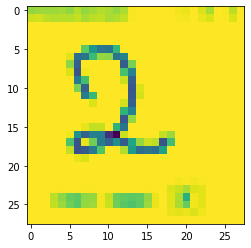

In [38]:
from keras.utils.image_utils import img_to_array
from tensorflow.keras.models import load_model
model = load_model('/content/digit_classifier.h5')
from PIL import Image
import numpy as np

img = Image.open('/content/sample.png').convert("L")
img = img.resize((28,28))
im2arr = np.array(img)
im2arr = im2arr.reshape(1,28,28,1)

#display the image
import matplotlib.pyplot as plt
plt.imshow(img)

#predict the image
y_predict = model.predict(im2arr)
print(np.argmax(y_predict[0]))

In [25]:
!pip install watson-machine-learning-client --upgrade

     |████████████████████████████████| 538 kB 22.0 MB/s eta 0:00:01


In [26]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
    "url": "https://us-south.ml.cloud.ibm.com",
    "apikey": "f2GuykXG7w9HSdHpcvIbjYDKmdjjwnpKVDQwkFrB5NEX"
}
client = APIClient(wml_credentials)

In [27]:
client = APIClient(wml_credentials)

In [28]:
def guid_from_space_name(client, space_name):
    space = client.spaces.get_details()
    #print(space)
    return(next(item for item in space['resources'] if item['entity']["name"] == space_name)['metadata']['id'])

In [29]:
space_uid = guid_from_space_name(client, 'Digit classification')
print("Space UID = " + space_uid)

Space UID = f69c17b3-cd42-44ed-90db-2832c9f7016f


In [31]:
client.set.default_space(space_uid)

'SUCCESS'

In [32]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
runtime-22.1-py3.9             12b83a1

In [36]:
software_spec_uid = client.software_specifications.get_uid_by_name("tensorflow_rt22.1-py3.9")
software_spec_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [37]:
model_details = client.repository.store_model(model='digit_classifier_new.tgz', meta_props={
    client.repository.ModelMetaNames.NAME:"CNN",
    client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid}
                                             )

model_id = client.repository.get_model_uid(model_details)

This method is deprecated, please use get_model_id()


/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/ibm_watson_machine_learning/repository.py:1453: UserWarning: This method is deprecated, please use get_model_id()
  warn("This method is deprecated, please use get_model_id()")


In [38]:
model_id

'546a9e16-ab6e-4a0a-b616-cd725f74124a'

In [39]:
client.repository.download(model_id, 'my_model.tar.gz')

Successfully saved model content to file: 'my_model.tar.gz'


'/home/wsuser/work/my_model.tar.gz'

In [43]:
from tensorflow.keras.models import load_model
from keras.preprocessing import image
from PIL import Image
import numpy as np

In [44]:
model=load_model("digit_classifier.h5")

In [40]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='4DVsscb9QHa9qi_N7JQNgrcfLHjHQm3dfnY1X0KaWfIG',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'handwrittendigitrecognitionsystem-donotdelete-pr-mrra9eo348u0iy'
object_key = '2.png'

streaming_body_3 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [45]:
img = Image.open(streaming_body_3).convert("L") # convert image to monochrome
img = img.resize( (28,28) ) # resizing

In [46]:
img

In [47]:
im2arr = np.array(img) #converting to image
im2arr = im2arr.reshape(1, 28, 28, 1) #reshaping according to our requirement

In [48]:
pred = model.predict(im2arr)
print(pred)

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


In [49]:
print(np.argmax(pred, axis=1)) #print the label

[2]
